<a href="https://colab.research.google.com/github/Cours-EDUlib/FAS-ISDS/blob/main/Exemples-applications-mod7/Ex_application_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Téléchargement des packages nécessaires
library (tidyverse)
install.packages("rsq")
require(rsq)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘lme4’, ‘numDeriv’


Loading required package: rsq



In [2]:
path_to_csv = 'https://github.com/Cours-EDUlib/FAS-ISDS/blob/main/Exemples-applications-mod7/donnees_app1-2-4.csv?raw=true' #Téléchargement de la base de données depuis github

bd <- read_csv(path_to_csv) #Enregistrement de la base de données dans l'ojet "bd"
bd #Lecture des données


── Column specification ────────────────────────────────────────────────────────
cols(
  st = col_double(),
  state = col_character(),
  region4 = col_double(),
  scs134 = col_double(),
  scs155 = col_double(),
  crc402 = col_double(),
  jbs170 = col_double(),
  pvs501 = col_double(),
  dms451 = col_double(),
  scs142 = col_double(),
  hts384 = col_double(),
  dms439 = col_double()
)




st,state,region4,scs134,scs155,crc402,jbs170,pvs501,dms451,scs142,hts384,dms439
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ALABAMA,3,12.6,1.9,5662.3,5.0,20.1,25.56,4295,9.4,60.4
2,ALASKA,4,9.6,3.1,6921.2,15.2,7.1,4.30,8353,3.3,67.5
3,ARIZONA,4,14.3,2.0,8703.6,5.2,16.1,3.46,4012,10.6,87.5
4,ARKANSAS,3,10.9,2.1,6178.1,5.2,14.9,15.86,4086,6.2,53.5
5,CALIFORNIA,4,14.3,1.9,5877.7,6.9,16.7,7.64,4878,21.5,92.6
6,COLORADO,4,9.6,2.6,5677.9,3.7,8.8,4.38,5086,10.5,82.4
7,CONNECTICUT,1,9.2,4.2,4662.8,5.1,9.7,9.16,8270,17.2,79.1
8,DELAWARE,3,11.2,1.8,5379.1,5.4,10.3,18.27,6944,19.4,73.0
9,DISTRICT OF COLUMBIA,3,19.1,3.1,12173.5,7.3,22.2,63.54,6767,116.8,100.0


In [ ]:
#Statistiques descriptives

summary(bd$scs134, sd)
summary(bd$jbs170, sd)

sd(bd$scs134)
sd(bd$jbs170)

In [ ]:
#Histogramme pour vérification du postulat de normalité

ggplot(bd, aes(x=scs134)) +
  geom_histogram(binwidth=1, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Distribution: taux de décrochage scolaire") +
    theme(
      plot.title = element_text(size=20)
    )

ggplot(bd, aes(x=jbs170)) +
  geom_histogram(binwidth=1, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Distribution: taux de chômage") +
    theme(
      plot.title = element_text(size=20)
    )

`geom_smooth()` using formula 'y ~ x'



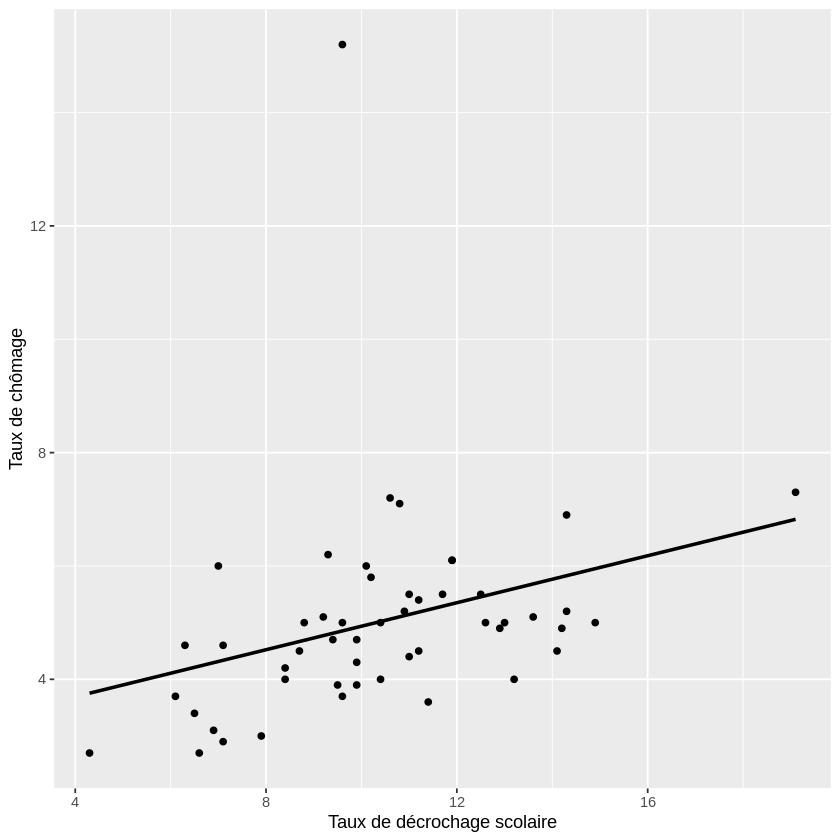

In [15]:
#Nuage de points

nuage <- ggplot(bd, aes(x=scs134, y=jbs170)) + 
            geom_point() +
            geom_smooth(method=lm , color="black", se=FALSE) 

nuage + labs(x = "Taux de décrochage scolaire", y = "Taux de chômage")

`geom_smooth()` using formula 'y ~ x'



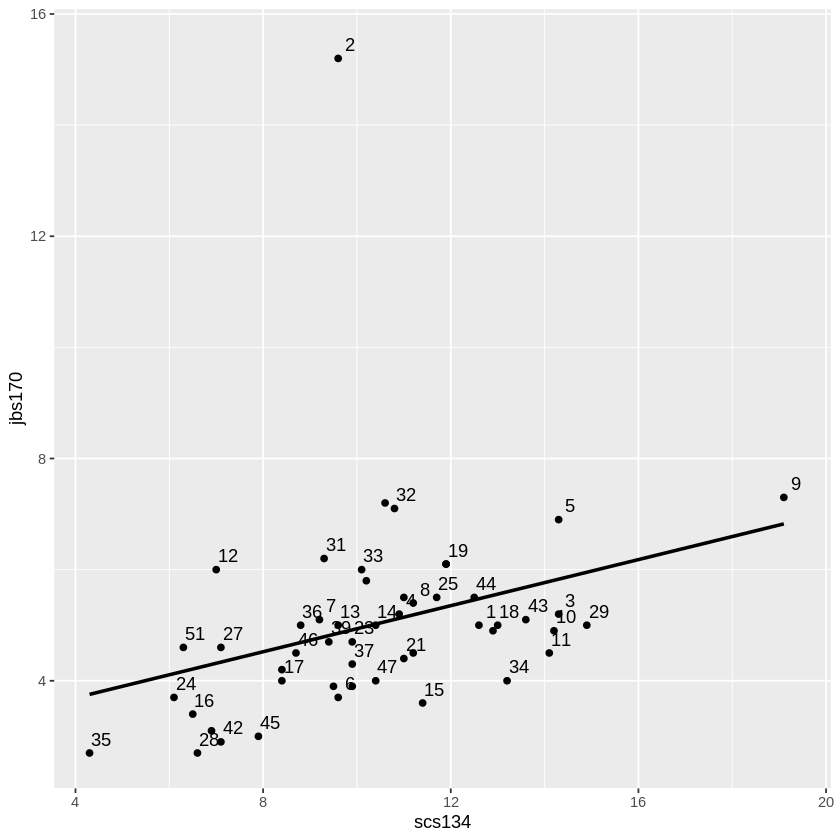

In [27]:
#Identifier un point dans un graphique
nuage2 <- ggplot(bd, aes(x=scs134, y=jbs170)) + 
            geom_point() +
            geom_smooth(method=lm , color="black", se=FALSE) +
            geom_text(
               label=rownames(bd), 
               nudge_x = 0.25, nudge_y = 0.25, 
               check_overlap = T
            )

In [32]:
#Faire la régression linéaire

reglineaire <- glm(jbs170 ~ scs134, data = bd, family="gaussian")
summary(reglineaire)


Call:
glm(formula = jbs170 ~ scs134, family = "gaussian", data = bd)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6271  -0.9204  -0.4051   0.3424  10.3461  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.86367    0.97099   2.949  0.00487 **
scs134       0.20732    0.09047   2.291  0.02627 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 3.103496)

    Null deviance: 168.37  on 50  degrees of freedom
Residual deviance: 152.07  on 49  degrees of freedom
AIC: 206.45

Number of Fisher Scoring iterations: 2


1           2           3           4           5           6 
-0.47584456 10.34610083 -0.62828029  0.07659116  1.07171971 -1.15389917 
          7           8           9          10          11          12 
 0.32902688  0.21439662  0.47660709 -0.90754877 -1.28681726  1.68512017 
         13          14          15          16          17          18 
 0.14610083 -0.01975128 -1.62706641 -0.81122227 -0.60512102 -0.55877062 
         19          20          21          22          23          24 
 0.76927603 -0.40512102 -0.74414036 -0.93316766 -0.21609371 -0.42829621 
         25          26          27          28          29          30 
 0.21073905 -0.68560338  0.26438865 -1.53195378 -0.95266937 -1.01609371 
         31          32          33          34          35          36 
 1.40829537  1.99732267  1.04244326 -1.60023364 -1.05512898  0.31195293 
         37          38          39          40          41          42 
-0.61609371  0.35585964 -0.11243615 -0.63803910  0.76927603 -1.43561135 
         43          44          45          46          47          48 
-0.58315970  0.04488695 -1.50146345 -0.16731555 -1.01975128  0.82171175 
         49          50          51 
 2.13878570 -1.19414832  0.43024076

In [56]:
#Identification des résidus
resid(reglineaire)
outliers <- bd$state[resid(reglineaire) < -3 | resid(reglineaire) > 3]
outliers

1           2           3           4           5           6 
-0.47584456 10.34610083 -0.62828029  0.07659116  1.07171971 -1.15389917 
          7           8           9          10          11          12 
 0.32902688  0.21439662  0.47660709 -0.90754877 -1.28681726  1.68512017 
         13          14          15          16          17          18 
 0.14610083 -0.01975128 -1.62706641 -0.81122227 -0.60512102 -0.55877062 
         19          20          21          22          23          24 
 0.76927603 -0.40512102 -0.74414036 -0.93316766 -0.21609371 -0.42829621 
         25          26          27          28          29          30 
 0.21073905 -0.68560338  0.26438865 -1.53195378 -0.95266937 -1.01609371 
         31          32          33          34          35          36 
 1.40829537  1.99732267  1.04244326 -1.60023364 -1.05512898  0.31195293 
         37          38          39          40          41          42 
-0.61609371  0.35585964 -0.11243615 -0.63803910  0.76927603 -1.43561135 
         43          44          45          46          47          48 
-0.58315970  0.04488695 -1.50146345 -0.16731555 -1.01975128  0.82171175 
         49          50          51 
 2.13878570 -1.19414832  0.43024076

[1] "ALASKA"

In [30]:
#Calcul du r-carré
rsq(reglineaire)

[1] 0.09678918

In [20]:
#Retrait de la donnée extrêême
bd2 <- bd[-2, ]

bd2

st,state,region4,scs134,scs155,crc402,jbs170,pvs501,dms451,scs142,hts384,dms439
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ALABAMA,3,12.6,1.9,5662.3,5.0,20.1,25.56,4295,9.4,60.4
3,ARIZONA,4,14.3,2.0,8703.6,5.2,16.1,3.46,4012,10.6,87.5
4,ARKANSAS,3,10.9,2.1,6178.1,5.2,14.9,15.86,4086,6.2,53.5
5,CALIFORNIA,4,14.3,1.9,5877.7,6.9,16.7,7.64,4878,21.5,92.6
6,COLORADO,4,9.6,2.6,5677.9,3.7,8.8,4.38,5086,10.5,82.4
7,CONNECTICUT,1,9.2,4.2,4662.8,5.1,9.7,9.16,8270,17.2,79.1
8,DELAWARE,3,11.2,1.8,5379.1,5.4,10.3,18.27,6944,19.4,73.0
9,DISTRICT OF COLUMBIA,3,19.1,3.1,12173.5,7.3,22.2,63.54,6767,116.8,100.0
10,FLORIDA,3,14.2,1.6,7920.5,4.9,16.2,14.67,5355,29.8,84.8


In [18]:
#Refaire la régression linéaire

reglineaire2 <- glm(jbs170 ~ scs134, data = bd2, family="gaussian")
summary(reglineaire2)


Call:
glm(formula = jbs170 ~ scs134, family = "gaussian", data = bd2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4543  -0.7134  -0.1413   0.5480   2.3413  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.43058    0.52138   4.662 2.52e-05 ***
scs134       0.22907    0.04848   4.725 2.04e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.8897811)

    Null deviance: 62.573  on 49  degrees of freedom
Residual deviance: 42.709  on 48  degrees of freedom
AIC: 140.01

Number of Fisher Scoring iterations: 2


In [19]:
#Recalculer le r-carré
rsq(reglineaire2)

[1] 0.3174432